Skipping file: .ipynb_checkpoints, Error: [Errno 13] Permission denied: 'C:\\Users\\petin\\sem5\\lab4\\imgs\\.ipynb_checkpoints'
Skipping file: also-not-an-img.txt, Error: cannot identify image file 'C:\\Users\\petin\\sem5\\lab4\\imgs\\also-not-an-img.txt'
Skipping file: not-an-img.txt, Error: cannot identify image file 'C:\\Users\\petin\\sem5\\lab4\\imgs\\not-an-img.txt'



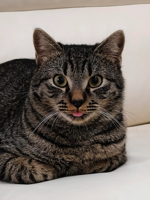
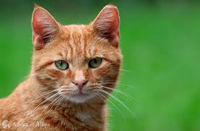
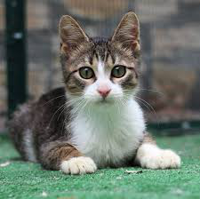
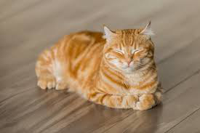
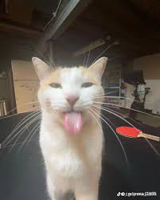
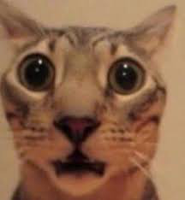
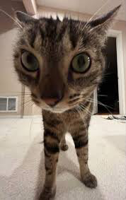
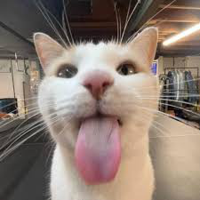
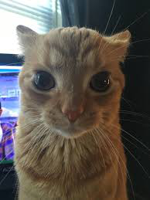
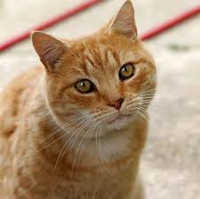
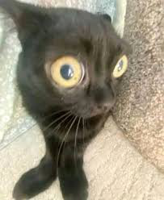
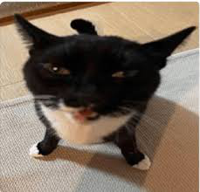
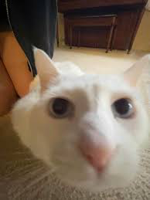
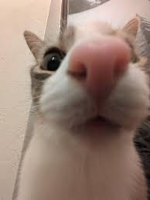
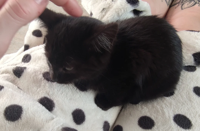
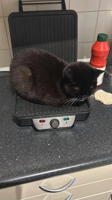
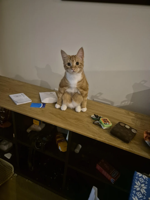

In [1]:
import os
import pandas as pd
from PIL import Image
from IPython.display import HTML, display
from io import BytesIO
import base64

def analyze_images(folder_path):

    image_data = [] 

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            with Image.open(file_path) as img:
                file_size = os.path.getsize(file_path) / (1024 * 1024) 
                width, height = img.size
                color_model = img.mode
                format_img = img.format

                thumbnail = img.copy()
                thumbnail.thumbnail((200, 200))
                buffer = BytesIO()
                thumbnail.save(buffer, format="PNG")
                encoded_thumbnail = base64.b64encode(buffer.getvalue()).decode("utf-8")

                image_data.append({
                    "File Name": file_name,
                    "Color Model": color_model,
                    "Format": format_img,
                    "Channels": len(img.getbands()),
                    "File Size (MB)": round(file_size, 2),
                    "Width": width,
                    "Height": height,
                    "Thumbnail": f'<img src="data:image/png;base64,{encoded_thumbnail}" width="50" height="50"/>'
                })
        except Exception as e:
            print(f"Skipping file: {file_name}, Error: {e}")
    
    df = pd.DataFrame(image_data)
    return df

def display_html_table(df):

    html_table = df.to_html(escape=False, index=False)
    display(HTML(html_table))

folder = "imgs"  
df = analyze_images(folder)

if not df.empty:
    display_html_table(df)
else:
    print("No images found in the folder!")

In [2]:
import random
from PIL import Image, ImageEnhance, ImageFilter
from IPython.display import display 

def preprocess_image(image, size):

    if image.mode != "RGB":
        image = image.convert("RGB")
    
    min_side = min(image.size)
    cropped_image = image.crop((
        (image.width - min_side) // 2,
        (image.height - min_side) // 2,
        (image.width + min_side) // 2,
        (image.height + min_side) // 2
    ))
    resized_image = cropped_image.resize((size, size), Image.LANCZOS)
    return resized_image

def apply_random_filter(image):
    # Список кольорових фільтрів
    color_filters = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "magenta": (255, 0, 255),
        "cyan": (0, 255, 255),
    }
    # Вибір випадкового кольору
    chosen_color = random.choice(list(color_filters.values()))
    
    # Створення кольорового накладання
    overlay = Image.new("RGB", image.size, chosen_color)
    blended = Image.blend(image, overlay, alpha=0.3)  # Накладаємо з прозорістю 30%
    
    return blended


def create_poster(folder_path, output_file, rows, cols, image_size=500):

    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                   if f.endswith(('png', 'jpg', 'jpeg', 'webp'))]
    
    if not image_files:
        raise ValueError("No valid images found in the folder!")

    poster_width = cols * image_size
    poster_height = rows * image_size
    poster = Image.new("RGB", (poster_width, poster_height), "white")

    for row in range(rows):
        for col in range(cols):
            img_path = random.choice(image_files)
            with Image.open(img_path) as img:
                img = preprocess_image(img, image_size)
                img = apply_random_filter(img)

                x = col * image_size
                y = row * image_size
                poster.paste(img, (x, y))

    poster.save(output_file, quality=95)  
    print(f"Poster saved as {output_file}")
    
    display(poster)  

Poster saved as poster-1.jpg


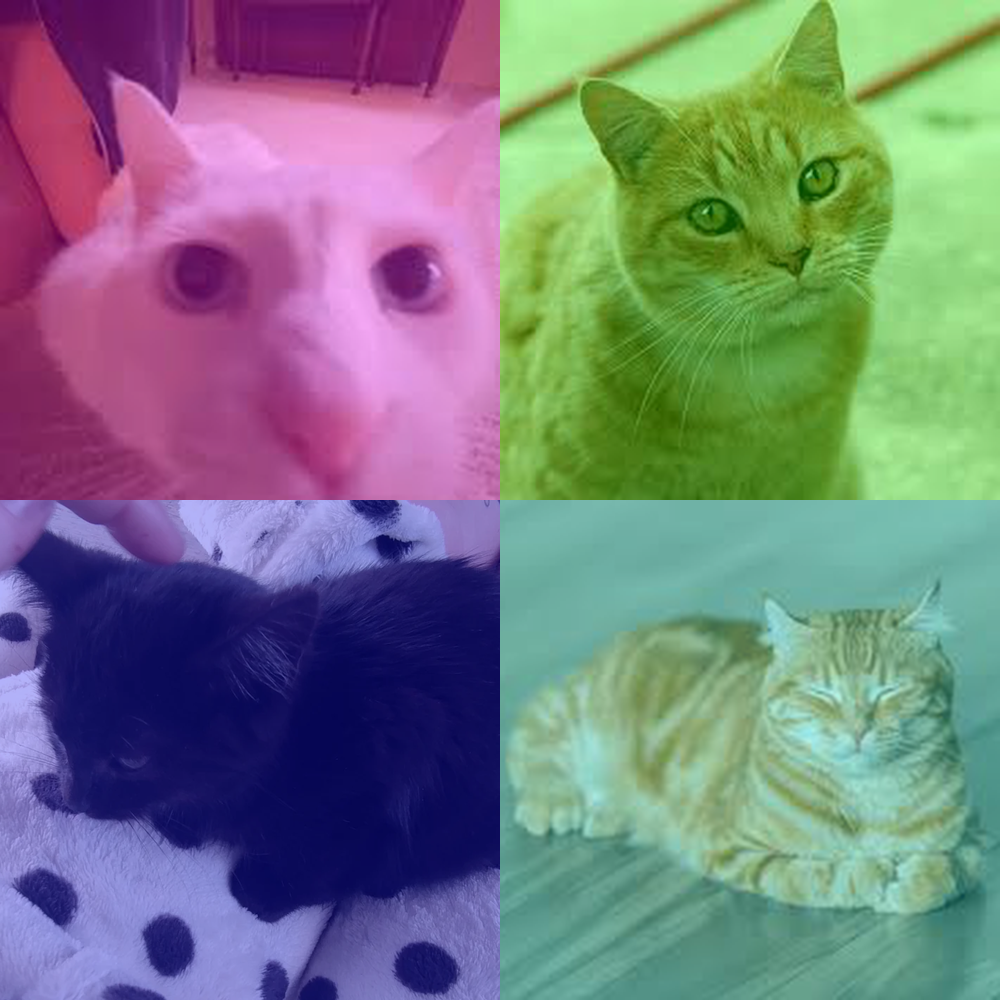

Poster saved as poster-2.jpg


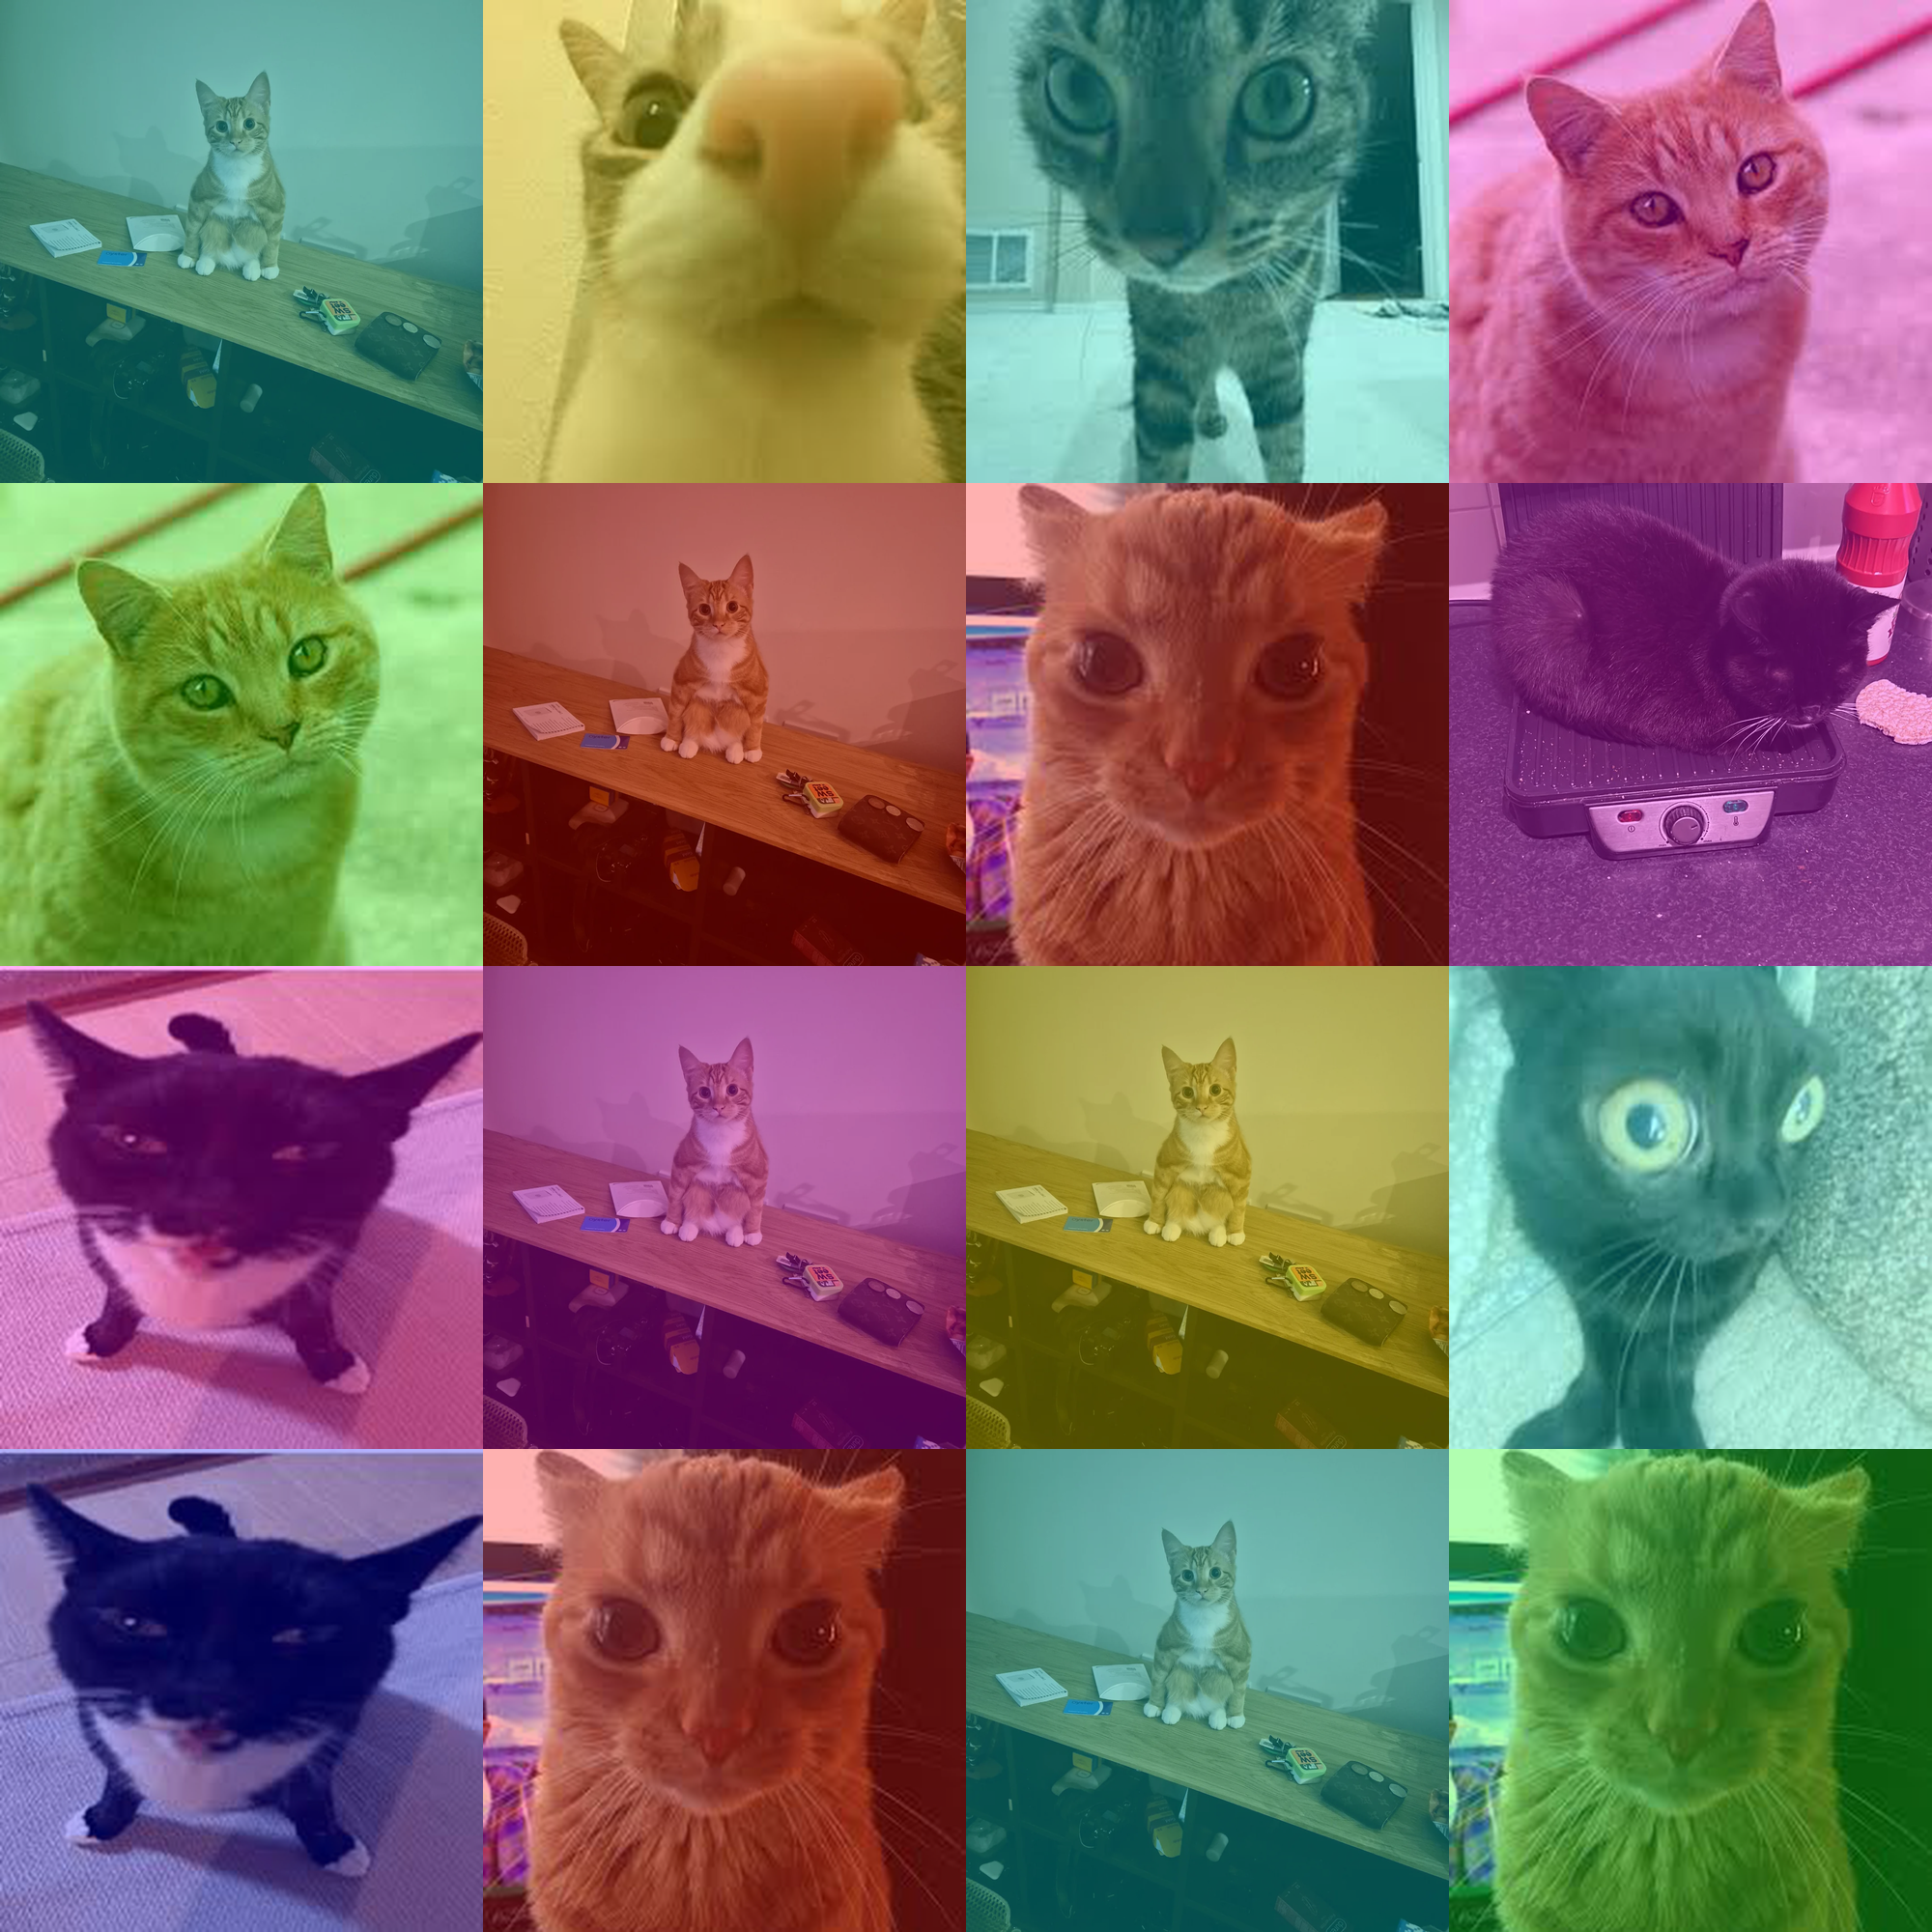

In [3]:
folder = "imgs"  
create_poster(folder, "poster-1.jpg", rows=2, cols=2, image_size=500)
create_poster(folder, "poster-2.jpg", rows=4, cols=4, image_size=500)